In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

In [2]:
import pandas as pd
from datetime import datetime, timedelta

all_df = pd.read_csv(
    '/content/drive/MyDrive/Time series analysis/data/household_power_consumption.csv', # 전력 소비량 예측을 위한 데이터셋
    header=0, 
    infer_datetime_format=True, 
    parse_dates=['datetime'], 
    index_col=['datetime'])

In [6]:
all_df # 해상도가 높은 데이터다! - why? 분 단위로 되어있는 데이터이기 때문에 => 일 단위로 진행하고싶다.

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


In [7]:
help(all_df.resample)

Help on method resample in module pandas.core.frame:

resample(rule, axis=0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on=None, level=None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampli

In [8]:
daily_groups = all_df.resample('D') # D = Day 분단위 => 일단위

In [9]:
daily_groups

In [10]:
daily_data = daily_groups.sum() # 합칠 연산 (더하기, 평균)
# daily_data = daily_groups.mean()

In [11]:
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664


In [12]:
daily_groups = all_df.resample('D')
daily_data = daily_groups.sum()
# summarize
print(all_df.shape)
print(daily_data.head())

(2075259, 8)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9

In [13]:
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,13769.466664


In [14]:
dataset = daily_data

## Helper => 데이터 스플릿

In [16]:
import numpy as np
from numpy import split
from numpy import array

def split_dataset(data):
	train, test = data[1:-328], data[-328:-6] 

	train = array(split(train, len(train)/7)) # 1주 단위로 쪼개기
	test = array(split(test, len(test)/7))
	return train, test

In [17]:
split_dataset(dataset)

(array([[[3.39046000e+03, 2.26006000e+02, 3.45725320e+05, ...,
          4.18700000e+03, 1.33410000e+04, 3.69466667e+04],
         [2.20382600e+03, 1.61792000e+02, 3.47373640e+05, ...,
          2.62100000e+03, 1.40180000e+04, 1.90284333e+04],
         [1.66619400e+03, 1.50942000e+02, 3.48479010e+05, ...,
          7.60200000e+03, 6.19700000e+03, 1.31319000e+04],
         ...,
         [1.72328800e+03, 1.44434000e+02, 3.47096410e+05, ...,
          2.69200000e+03, 1.04560000e+04, 1.38084667e+04],
         [2.34133800e+03, 1.86906000e+02, 3.47305750e+05, ...,
          3.50000000e+02, 1.11310000e+04, 2.43903000e+04],
         [4.77338600e+03, 2.21470000e+02, 3.45795950e+05, ...,
          4.25000000e+02, 1.47260000e+04, 6.17364334e+04]],
 
        [[2.55001200e+03, 1.49900000e+02, 3.48029910e+05, ...,
          5.08200000e+03, 6.89100000e+03, 2.88242000e+04],
         [2.74312000e+03, 2.40280000e+02, 3.50495900e+05, ...,
          1.96200000e+03, 5.79500000e+03, 3.13416666e+04],
       

In [ ]:
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.268
(46, 7, 8)
2083.454 2197.006


## Helper => 예측 후 결과 확인 (평가, 시각화)

In [ ]:
from sklearn.metrics import mean_squared_error
# 평균제곱오차(Mean Square Error,MSE) -> 실제 데이터와 예측 데이터 편차의 제곱 합
from math import sqrt

def evaluate_forecasts(actual, predicted):
	scores = list()
	for i in range(actual.shape[1]):
		mse = mean_squared_error(actual[:, i], predicted[:, i]) 
		# MSE는 회귀 분석과 유사한 용도 -> MSE 역시 주식 가격예측과 같은 연속형 데이터 사용할 때 사용
		rmse = sqrt(mse)
		scores.append(rmse)
	
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [ ]:
import math
input_data = input("제곱근을 구할 수를 입력하세요 : ")
print(input_data, "의 제곱근(루트)는", sqrt(float(input_data)), "입니다")

제곱근을 구할 수를 입력하세요 : 9
9 의 제곱근(루트)는 3.0 입니다


In [ ]:
def evaluate_model(train, test, n_input):
	model = build_model(train, n_input)
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = forecast(model, history, n_input)
		predictions.append(yhat_sequence)
		history.append(test[i, :])
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [ ]:
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

In [ ]:
def to_supervised(train, n_input, n_out=7):
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	for _ in range(len(data)):
		in_end = in_start + n_input
		out_end = in_end + n_out
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		in_start += 1
	return array(X), array(y)

## Modeling Part

In [ ]:
import tensorflow as tf

tf.random.set_seed(2)

In [ ]:
# 13p model
from keras.models import Sequential
from keras.layers import Dense # 일반적이 NN
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def build_model(train, n_input):
    train_x, train_y = to_supervised(train, n_input)
    verbose, epochs, batch_size = 0, 20, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    
    model = Sequential()

                # conv => 요약된 정보의 차원:64, kernel_size=window 사이즈, 3 
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
	          input_shape=(n_timesteps, n_features)))
                # conv => 64차원, window 3
    model.add(MaxPooling1D(pool_size=2)) # 중요한 정보만 남김
    model.add(Flatten())

    # 펼친 벡터를 LSTM에다가 각각 입력으로 넣는다.
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(200, activation='relu', return_sequences=True)) # return_sequences=True LSTM 다음값으로 모두 전달이 된다.But, False면, 마지막값만 전달(many to many or many to one)

    # LSTM의 리턴값으로 받은 시퀀스 각각에 대해 수행
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    
    model.compile(loss='mse', optimizer='adam')
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model
 
def forecast(model, history, n_input):
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	input_x = data[-n_input:, 0]
	input_x = input_x.reshape((1, len(input_x), 1))
	yhat = model.predict(input_x, verbose=0)
	yhat = yhat[0]
	return yhat


lstm: [701.995] 869.2, 642.2, 635.4, 713.0, 626.1, 591.2, 792.6


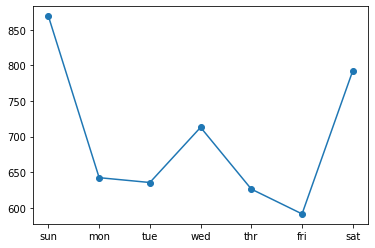

In [ ]:
import matplotlib.pyplot as plt

n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
plt.plot(days, scores, marker='o', label='lstm')
plt.show()

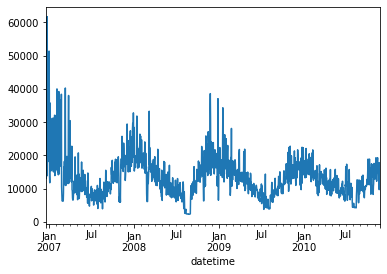

In [ ]:
daily_data['sub_metering_4'].plot()